### Identitas
##### Nama : Barhan Akmal Falahudin
##### NRP  : 5025201008
##### Asal : Institut Teknologi Sepuluh Nopember
### Tanggal Pengerjaan
##### 15 November 2020

In [388]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [389]:
data_frame = pd.read_csv("Survei_Makanan_Ringan.csv")
data_frame.head(10)

,Cap waktu,Berapakah umur anda?,Apakah jenis kelamin anda?,Pendidikan anda saat ini?,"Apakah anda suka dengan makanan ringan atau snack(misal: kripik kentang, kripik ikan) ?","Menurut anda, seberapa pentingkah gizi yang dikandung dalam makanan ringan?",Seberapa suka anda mencoba makanan baru?,"Seberapa seringkah anda mengakses marketplace (Tokopedia, Shopee, Bukalapak, dll.) dalam sehari?",Anda lebih memilih yang mana untuk membeli makanan ringan atau snack?
0,2020/11/14 7:40:40 AM GMT+7,14 - 18 tahun,Perempuan,SMA,5,3,5,1 kali,Toko Konvensional
1,2020/11/14 7:43:12 AM GMT+7,19 - 25 tahun,Perempuan,S1/D4,4,2,3,1 kali,Toko Konvensional
2,2020/11/14 7:46:49 AM GMT+7,>35 tahun,Laki - laki,Telah lulus/bekerja,4,3,4,1 kali,Toko Online
3,2020/11/14 7:51:33 AM GMT+7,19 - 25 tahun,Laki - laki,S1/D4,5,3,5,1 kali,Toko Konvensional
4,2020/11/14 8:03:30 AM GMT+7,19 - 25 tahun,Perempuan,S1/D4,5,4,5,1 kali,Toko Online
5,2020/11/14 8:07:07 AM GMT+7,19 - 25 tahun,Laki - laki,D3,3,4,5,lebih dari 5 kali,Toko Konvensional
6,2020/11/14 8:07:25 AM GMT+7,19 - 25 tahun,Perempuan,S1/D4,5,5,3,1 kali,Toko Konvensional
7,2020/11/14 8:09:12 AM GMT+7,19 - 25 tahun,Perempuan,S1/D4,5,3,4,3 kali,Toko Konvensional
8,2020/11/14 8:10:21 AM GMT+7,19 - 25 tahun,Perempuan,S1/D4,4,5,1,1 kali,Toko Konvensional
9,2020/11/14 8:11:06 AM GMT+7,19 - 25 tahun,Perempuan,S1/D4,5,3,4,3 kali,Toko Konvensional


## Data Preparation

In [390]:
data_frame = data_frame.iloc[:, [1, 2, 4, 5, 6, 7, 8]]
data_frame.columns = ["umur", "gender", "suka_kripik", "gizi", "suka_baru", "banyak_akses", "toko"]
data_frame.head()

,umur,gender,suka_kripik,gizi,suka_baru,banyak_akses,toko
0,14 - 18 tahun,Perempuan,5,3,5,1 kali,Toko Konvensional
1,19 - 25 tahun,Perempuan,4,2,3,1 kali,Toko Konvensional
2,>35 tahun,Laki - laki,4,3,4,1 kali,Toko Online
3,19 - 25 tahun,Laki - laki,5,3,5,1 kali,Toko Konvensional
4,19 - 25 tahun,Perempuan,5,4,5,1 kali,Toko Online


## Data Cleaning

In [391]:
data_frame['gender'] = data_frame['gender'].apply(lambda nama:0 if (nama=='Laki - laki') else 1) 

In [392]:
data_frame['toko'] = data_frame['toko'].apply(lambda toko: 0 if(toko=='Toko Online') else 1)

In [393]:
def clean_banyak_akses(a):
    if a[0]=='1':
        return '1';
    elif a[0] == '3':
        return '3';
    elif a[0] == '5':
        return '5';
    elif a == 'Tidak pernah':
        return '0';
    elif a == 'lebih dari 5 kali':
        return '>5'

In [394]:
data_frame['banyak_akses'] = data_frame['banyak_akses'].apply(lambda x: clean_banyak_akses(x))

In [395]:
data_frame['suka_kripik'] = pd.to_numeric(data_frame['suka_kripik'])
data_frame['gizi'] = pd.to_numeric(data_frame['gizi'])
data_frame['suka_baru'] = pd.to_numeric(data_frame['suka_baru'])
data_frame.head(5)

,umur,gender,suka_kripik,gizi,suka_baru,banyak_akses,toko
0,14 - 18 tahun,1,5,3,5,1,1
1,19 - 25 tahun,1,4,2,3,1,1
2,>35 tahun,0,4,3,4,1,0
3,19 - 25 tahun,0,5,3,5,1,1
4,19 - 25 tahun,1,5,4,5,1,0


In [396]:
data_sum_umur = data_frame.groupby('umur').sum()
data_sum_gender = data_frame.groupby('gender').sum()
data_mean = data_frame.mean();

In [397]:
umurs = data_frame['umur'].unique()
genders = data_frame['gender'].unique()

In [398]:
umurs[2], umurs[3] = umurs[3], umurs[2]
print(umurs)

['14 - 18 tahun' '19 - 25 tahun' '25 - 35 tahun' '>35 tahun']


In [399]:
banyak_umur = data_frame['umur'].value_counts()
print(banyak_umur)

14 - 18 tahun    44
19 - 25 tahun    31
25 - 35 tahun     4
>35 tahun         2
Name: umur, dtype: int64


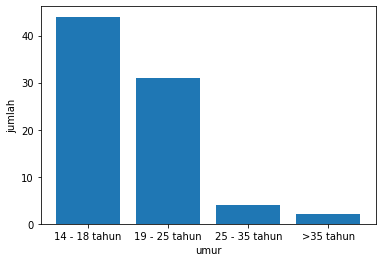

In [400]:
plt.bar(umurs, banyak_umur)

plt.xlabel('umur')
plt.ylabel('jumlah')

plt.show()

#### Dapat dilihat bahwa mayoritas reponden berusia 14 sampai dengan 18 tahun

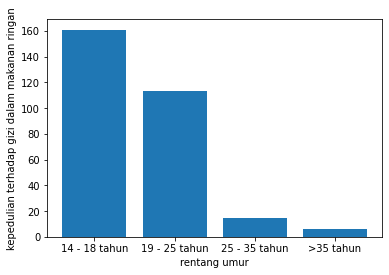

In [401]:
plt.bar(umurs, data_sum_umur['gizi'])

plt.ylabel('kepedulian terhadap gizi dalam makanan ringan')
plt.xlabel('rentang umur')

plt.show()

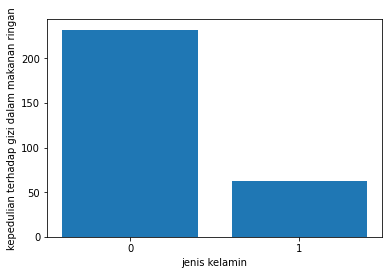

In [402]:
plt.bar(genders, data_sum_gender['gizi'])

plt.ylabel('kepedulian terhadap gizi dalam makanan ringan')
plt.xlabel('jenis kelamin')

plt.xticks(genders)

plt.show()

### 0 = Laki laki
### 1 = Perempuan

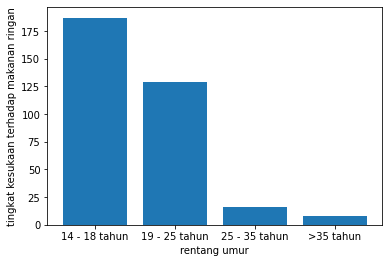

In [403]:
plt.bar(umurs, data_sum_umur['suka_kripik'])

plt.ylabel('tingkat kesukaan terhadap makanan ringan')
plt.xlabel('rentang umur')

plt.show()

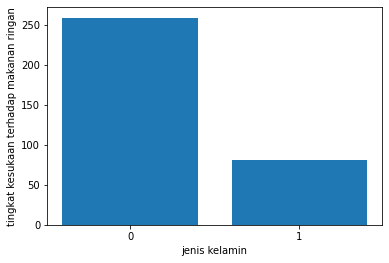

In [404]:
plt.bar(genders, data_sum_gender['suka_kripik'])

plt.ylabel('tingkat kesukaan terhadap makanan ringan')
plt.xlabel('jenis kelamin')

plt.xticks(genders)

plt.show()

### 0 = Laki laki
### 1 = Perempuan

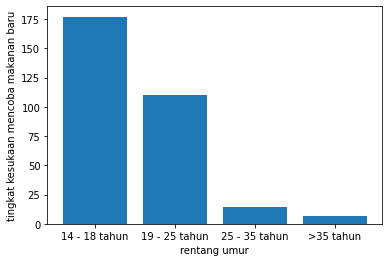

In [405]:
plt.bar(umurs, data_sum_umur['suka_baru'])

plt.ylabel('tingkat kesukaan mencoba makanan baru')
plt.xlabel('rentang umur')

plt.show()

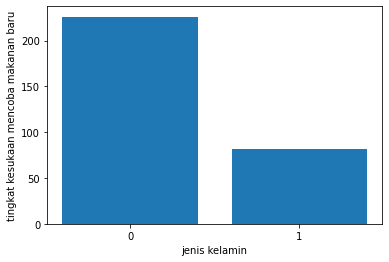

In [406]:
plt.bar(genders, data_sum_gender['suka_baru'])

plt.ylabel('tingkat kesukaan mencoba makanan baru')
plt.xlabel('jenis kelamin')

plt.xticks(genders)

plt.show()

### 0 = Laki laki
### 1 = Perempuan

In [407]:
print(data_mean)

gender         0.765432
suka_kripik    4.197531
gizi           3.641975
suka_baru      3.802469
toko           0.962963
dtype: float64


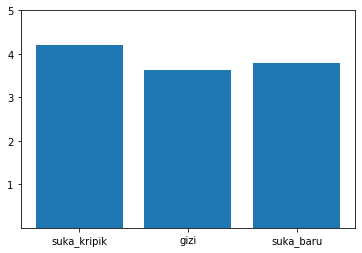

In [411]:
labels = ['suka_kripik', 'gizi', 'suka_baru']
ylabels  = [1, 2, 3, 4, 5]

plt.bar(labels, data_mean[labels])

plt.yticks(ylabels)

plt.show()

In [412]:
data_max = data_frame.max()

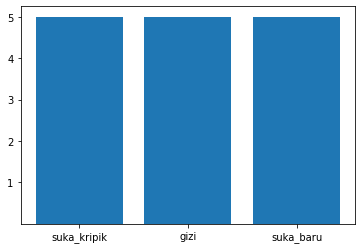

In [414]:
labels = ['suka_kripik', 'gizi', 'suka_baru']
ylabels  = [1, 2, 3, 4, 5]

plt.bar(labels, data_max[labels])

plt.yticks(ylabels)

plt.show()

### Ringkasan:
Dari berbagai data yang telah dipaparkan, didapatkan informasi bahwa rentang umur yang paling suka dengan makanan ringan adalah rentang umur 14 - 18 tahun, kemudian disusul oleh rentang umur 19 - 25 tahun, 25 - 35 tahun, dan lebih dari 35 tahun. Rentang umur dengan minat untuk mencoba makanan baru tertinggi adalah rentang umur 14 - 18 tahun, kemudian disusul oleh rentang umur 19 - 25 tahun, 25 - 35 tahun, dan lebih dari 35 tahun. Rentang umur dengan kepedulian terhadap gizi pada makanan ringan tertinggi adalah rentang umur 14 - 18 tahun, kemudian disusul oleh rentang umur 19 - 25 tahun, 25 - 35 tahun, dan lebih dari 35 tahun. 


### Kesimpulan:
Dari berbagai data segmentasi pasar yang telah diperoleh, didapatkan kesimpulan bahwa target pasar yang sesuai untuk produk keripik ikan kelor adalah: 
1. Rentang umur  : 14 - 25 tahun
2. Jenis Kelamin : Laki - laki 